## データ作成

In [5]:
import numpy as np
np.random.rand(100).astype(np.float32)

array([0.64575507, 0.77344652, 0.02373578, 0.71024471, 0.53208857,
       0.39423904, 0.99224843, 0.77827114, 0.88430283, 0.87887829,
       0.6060434 , 0.75683023, 0.63204604, 0.70488397, 0.87713048,
       0.94858502, 0.76879302, 0.04758263, 0.49817893, 0.21950827,
       0.89872396, 0.43382328, 0.75780741, 0.67990662, 0.5495712 ,
       0.4365965 , 0.3210657 , 0.22700918, 0.44212671, 0.25234163,
       0.07633117, 0.51265358, 0.40601136, 0.26773688, 0.51937778,
       0.75965494, 0.44168024, 0.68017778, 0.01956178, 0.222081  ,
       0.20418108, 0.1500125 , 0.19638984, 0.07378016, 0.51018419,
       0.30160112, 0.87407139, 0.26104026, 0.04696112, 0.17888879,
       0.69327257, 0.80360408, 0.91584507, 0.33306014, 0.25630159,
       0.25655743, 0.83017016, 0.54180967, 0.12280864, 0.84523274,
       0.31609771, 0.81795384, 0.71124917, 0.98841589, 0.63591024,
       0.82402666, 0.66637651, 0.30565656, 0.75792885, 0.96454511,
       0.06998855, 0.38792577, 0.10220793, 0.34852538, 0.55994

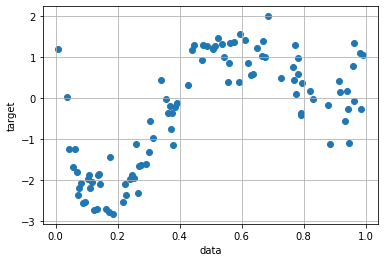

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#データ点数
n = 100

#データ生成関数（四次）
def true_func(x):
  z = 1-48*x+218*x**2-315*x**3+145*x**4
  return z

#ランダムに関数からターゲット生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

#targetにノイズ加える
noise = 0.5 * np.random.randn(n)
target = target + noise
#作成データを描写
plt.scatter(data, target)
plt.ylabel('target')
plt.xlabel('data')
plt.grid()
plt.show()


## モデル作成

## 多項式関数を利用したモデル

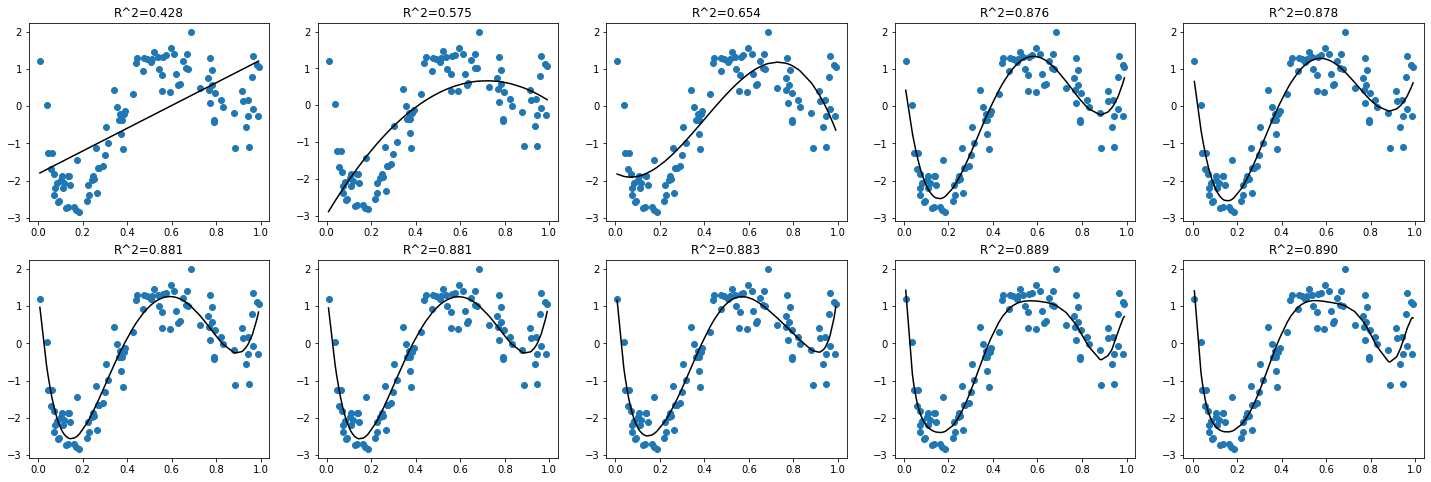

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

#形状変形(100,⇒100,1)
data = data.reshape(-1,1)
target = target.reshape(-1,1)

# 次数設定
deg = [1,2,3,4,5,6,7,8,9,10]

# 次数分グラフ準備
fig, axes = plt.subplots(2, 5, figsize=(25,8))

#非線形変換とパラメータ学習
for d in deg:
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear',LinearRegression())
                   ])
  #モデル学習
  regr.fit(data, target)

  #予測
  p_poly =  regr.predict(data)

  #グラフ描写
  if d < 6:
    i, j = 0, d-1
  else:
    i, j = 1, d-6
  axes[i][j].scatter(data, target)
  axes[i][j].plot(data,p_poly,color='black')
  #決定係数の算出
  axes[i][j].set_title('R^2={:.3f}'.format(regr.score(data, target)))

plt.show()





##ガウス型基底関数を利用したモデル




(100, 100)


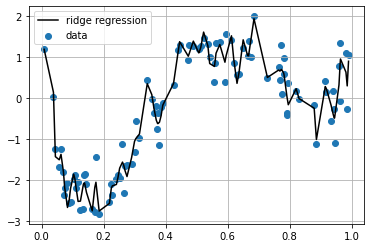

0.949806712945383


In [8]:
from sklearn.metrics.pairwise import rbf_kernel

# ガウス型既定関数による非線形変換
kx = rbf_kernel(X=data,Y=data, gamma=500)

print(kx.shape)
#線形回帰学習
clf = LinearRegression()
clf.fit(kx, target)

# 学習モデルで予測
p_lin = clf.predict(kx)

#グラフ描写
plt.scatter(data, target,label='data')
plt.plot(data, p_lin, color='black', linestyle='-',label='ridge regression')
plt.legend()
plt.grid()
plt.show()

# 決定係数
print(clf.score(kx,target))
